In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# LFVHD Scotogenic model 
## Diagrams
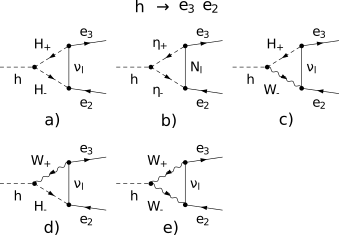

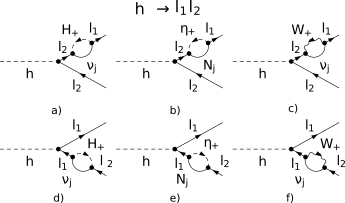

Our conventions to this Feynman diagrams are shown below

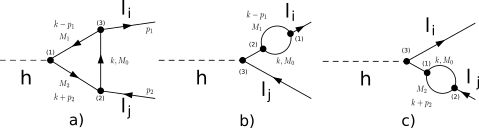

## Couplings

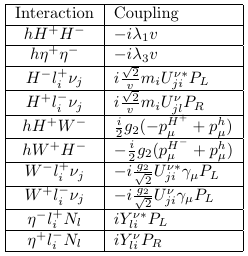

In [2]:
from sympy import symbols, init_printing, conjugate,I,IndexedBase,sqrt,collect,simplify
from sympy import lambdify
init_printing()

In [3]:
import OneLoopLFVHD as lfvhd

In [4]:
mh,mi,mj = lfvhd.ma,lfvhd.mi,lfvhd.mj
mh,mi,mj

In [5]:
from mpmath import mp

In [6]:
mp.dps = 80; mp.pretty = True

## Light neutrino contribution 

### FSS contribution

We have two posibles diagrams with this form the first one is $\nu_l H^{+} H^{-}$, then we need the next couplings
$h H^{+} H^{-} \rightarrow -i \lambda_1 v$, $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$ and 
$H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ assuming summation on repeated indexes

In [7]:
g,v = symbols(r'g,v',real=True)
λ1 = mh**2/v**2
U = IndexedBase(r'U')
mnul,mW = symbols(r'm_{{\nu_l}},m_W',real=True)

l,b,i,j = symbols('l,b,i,j',integer=True)
hGdGu = lfvhd.VertexHSS(-I*λ1*v)
Guljνl = lfvhd.VertexSFF(I*(sqrt(2)/v)*mj*U[l,j],0)
Gdliνl = lfvhd.VertexSFF(0,I*(sqrt(2)/v)*mi*conjugate(U[l,i]))

# Guljνl = lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mj*U[l,j],(-I*g)/(sqrt(2)*mW)*mnul*U[l,j])
# Gdliνl = lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*mnul*conjugate(U[l,i]),
#                          (I*g)/(sqrt(2)*mW)*mi*conjugate(U[l,i]))


In [8]:

νlGG = lfvhd.TriangleFSS(hGdGu,Guljνl,Gdliνl,[mnul,mW,mW])


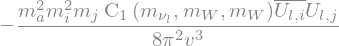

In [9]:
νlGG.AR().simplify()

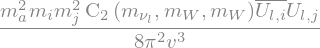

In [10]:
νlGG.AL().simplify()

## FSV contribution
In this case we only have one contribution, $\nu_{l} H^{+} W^{-}$, the we need to consider the next couplings
$h H^{+} W^{-} \rightarrow -\frac{i}{2}g_2 (p^{H^{+}}_\mu - p^{h}_\mu)$, $W^{-} \mu^{+} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu *}_{l2} \gamma_\mu P_L$ and $ H^{+} \tau^{-} \nu_l \rightarrow i Y^{e*}_{3,b}U^{\nu}_{lb} P_R$

In [11]:
hGdWu = lfvhd.VertexHSpVm(-I*g/2)
Wuljνl = lfvhd.VertexVFF(0,-I*(g/sqrt(2))*U[l,j])


In [12]:
νlGW = lfvhd.TriangleFSV(hGdWu,Wuljνl,Gdliνl,[mnul,mW,mW])
#triangulo['νlGW'] = νlGW

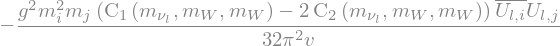

In [13]:
νlGW.AR().factor()

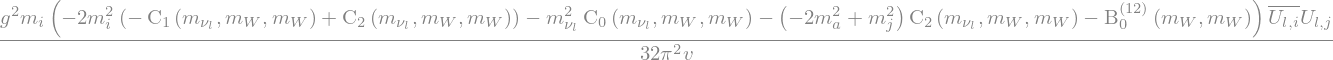

In [14]:
(νlGW.AL())#.expand().collect([νlGW.Cs])

## FVS contribution
In this case we only have one contribution too, $\nu_{l} W^{+} H^{-}$, the we need to consider the next couplings
$h W^{+} H^{-} \rightarrow -\frac{i}{2}g_2 (-p^{H^{-}}_\mu + p^{h}_\mu)$, $ H^{-} \mu^{+} \nu_l \rightarrow i U^{\nu *}_{lb} Y^{e}_{2b}P_L$ and $W^{+} \tau^{-} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu}_{l3} \gamma_\mu P_L$

In [15]:
hWdGu = lfvhd.VertexHVpSm(-I*g/2)
#Hdμνl
Wdliνl = lfvhd.VertexVFF(0,-I*(g/sqrt(2))*conjugate(U[l,i]))


In [16]:
νlWG = lfvhd.TriangleFVS(hWdGu,Guljνl,Wdliνl,[mnul,mW,mW])
#triangulo['νlWG'] = νlWG

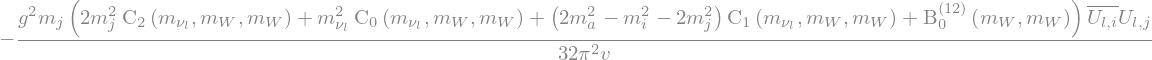

In [17]:
νlWG.AR()

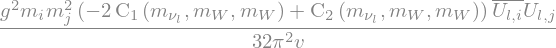

In [18]:
νlWG.AL()#.subs(cambiosDivFin(*Masas4)).simplify()

## FVV contribution
In this case we only have one contribution too, $\nu_{l} W^{+} W^{-}$, the we need to consider the next couplings
$h W^{+} W^{-} \rightarrow \frac{i}{2}g_2^2 v g_{\mu \nu}$, $ W^{-} \mu^{+} \nu_l \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu*}_{l2} \gamma_\mu P_L$ and $W^{+} \tau^{-} \nu_{l} \rightarrow -i \frac{g_2}{\sqrt{2}}U^{\nu}_{l3} \gamma_\mu P_L$

In [19]:
hWdWu = lfvhd.VertexHVV(I*g**2/2*v)
#Wdμνl = lfvhd.VertexVFF(0,-I*(g2/sqrt(2))*conjugate(U[l,j]))
#Wuτνl 

In [20]:
νlWW = lfvhd.TriangleFVV(hWdWu,Wuljνl,Wdliνl,[mnul,mW,mW])
#triangulo['νlWW'] = νlWW

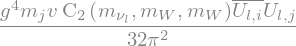

In [21]:
νlWW.AR().subs({lfvhd.D:4})

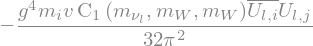

In [22]:
νlWW.AL().subs({lfvhd.D:4})#.subs(cambiosDivFin(*νlWuWd.masas)).simplify().subs(D,4)
#print('-'*200)

# Burbujas

This process also have Bubbles
## FV contribution
In this case we only have one contribution too, $\nu_{a} W^{+}$, the we need to consider the next couplings
$h e_{2} e_{2} \rightarrow \frac{ig m_2}{2\sqrt{2}m_W}$, $W^{+} \tau^{-} \nu_{a} \rightarrow i \frac{g}{\sqrt{2}}U^{\nu}_{1a} \gamma_\mu P_L$ and $ W^{-} \mu^{+} \nu_{a} \rightarrow i \frac{g}{\sqrt{2}}U^{\nu*}_{2a} \gamma_\nu P_L$ 

In [23]:
hljlj = lfvhd.VertexHFF((I*g*mj)/(2*sqrt(2)*mW))

nlW = lfvhd.BubbleFV(hljlj,Wuljνl,Wdliνl,[mnul,mW])
# MLL1 = nlW.AL().subs({lfvhd.D:4}).subs({lfvhd.A0(mW):lfvhd.PaVetoDivFin(lfvhd.A0(mW)),
#                                           lfvhd.B1_1(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_1(mnul,mW)),
#                              lfvhd.B1_0(mnul,mW):lfvhd.PaVetoDivFin(lfvhd.B1_0(mnul,mW))}).expand()

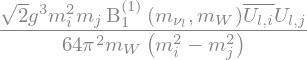

In [24]:
nlW.AR().subs({lfvhd.D:4})

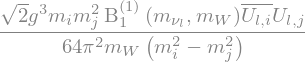

In [25]:
nlW.AL().subs({lfvhd.D:4})

## ML

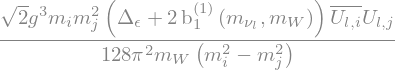

In [26]:
nlW.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

## MR


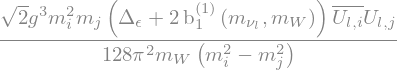

In [27]:
nlW.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

## Contributino VF

In [28]:
hlili = lfvhd.VertexHFF((I*g*mi)/(2*sqrt(2)*mW))
Wnl = lfvhd.BubbleVF(hlili,Wuljνl,Wdliνl ,[mnul,mW])

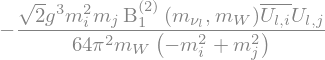

In [29]:
Wnl.AR().subs({lfvhd.D:4})

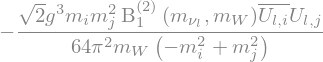

In [30]:
Wnl.AL().subs({lfvhd.D:4})#.subs({A0(mW):PaVetoDivFin(A0(mW)),B2_1(mnul,mW):PaVetoDivFin(B2_1(mnul,mW)),
                      #       B2_0(mnul,mW):PaVetoDivFin(B2_0(mnul,mW))})

## ML

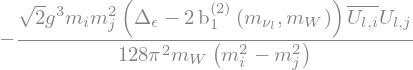

In [31]:
Wnl.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

## MR

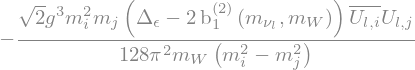

In [32]:
Wnl.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)

### Pruebas burbujas FV y VF

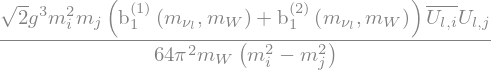

In [33]:
#divLnuW + divLWnu
#(divLnuW + divLWnu).simplify()
(nlW.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4) + 
Wnl.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify().subs(lfvhd.D,4)).simplify()

## FS contribution
In this case we only have one contribution too, $\nu_{a} H^{+}$, the we need to consider the next couplings
$h e_{2} e_{2} \rightarrow \frac{ig m_2}{2\sqrt{2}m_W}$, $H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ and $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$

In [34]:
#Hdμνl,Huτνl
nlG = lfvhd.BubbleFS(hljlj,Guljνl,Gdliνl,[mnul,mW])

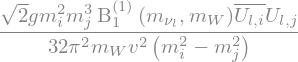

In [35]:
nlG.AR()

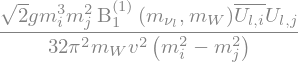

In [36]:
nlG.AL()

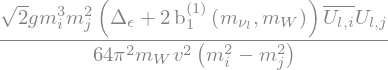

In [37]:
nlG.AL().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

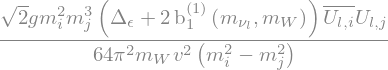

In [38]:
nlG.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()

## SF contribution
In this case we only have one contribution too, $H^{+} \nu_{l}$, the we need to consider the next couplings
$h e_{1} e_{1} \rightarrow \frac{ig m_1}{2\sqrt{2}m_W}$, $H^{+}\tau^{-} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_1 U^{\nu}_{l3} P_{R}$ and $H^{-}\mu^{+} \nu_{l} \rightarrow i \frac{\sqrt{2}}{v} m_2 U^{\nu *}_{l2} P_{L}$

In [39]:
Gnl = lfvhd.BubbleSF(hlili,Guljνl,Gdliνl,[mnul,mW])

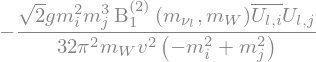

In [40]:
Gnl.AR()

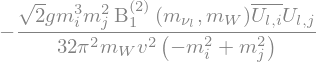

In [41]:
Gnl.AL()

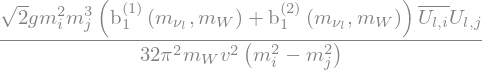

In [42]:
(Gnl.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify() + 
nlG.AR().subs(lfvhd.cambiosDivFin(mnul,mW,mW)).simplify()).simplify()

## $M_L$ Total

In [43]:
from OneLoopLFVHD.data import ml
ml

{1: 0.000511, 2: 0.10566, 3: 1.77686}

In [44]:
mh = symbols('m_h',real=True)
valores ={mW:mp.mpf('80.379'),mh:mp.mpf('125.10'),
          g:(2*mp.mpf('80.379'))/mp.mpf('246'),v:mp.mpf('246')}

In [45]:
cambios_hij = lambda ii, jj:{lfvhd.ma:valores[mh],lfvhd.mi:ml[ii],lfvhd.mj:ml[jj]}

Ulj, Ucli = symbols('U_{lj}, {{U_{li}^*}}')
UOne = {U[l,j]:Ulj,conjugate(U[l,i]):Ucli}


In [46]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [47]:
Dia1mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlGG.AL().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia1mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlGG.AR().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia2mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlGW.AL().subs(lfvhd.B12_0(mW,mW),0).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia2mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlGW.AR().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia3mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlWG.AL().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia3mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlWG.AR().subs(lfvhd.B12_0(mW,mW),0).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia4mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlWW.AL().subs(lfvhd.D,4).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia4mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    νlWW.AR().subs(lfvhd.D,4).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia5mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    nlW.AL().subs(lfvhd.D,4).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia5mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    nlW.AR().subs(lfvhd.D,4).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia6mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    Wnl.AL().subs(lfvhd.D,4).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia6mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    Wnl.AR().subs(lfvhd.D,4).subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia7mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    nlG.AL().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia7mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    nlG.AR().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia8mpL = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    Gnl.AL().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

Dia8mpR = lambda i,j: lambdify([mnul,Ulj, Ucli],replaceBs(
    Gnl.AR().subs(cambios_hij(i,j)).subs(valores).subs(UOne)),
                  modules=[pave_functions(valores[mh],i,j,lib='mpmath'),'mpmath'])

# Oscillations data

In [49]:
from OneLoopLFVHD.neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables

In [50]:
Upmns = mp.matrix([
[ 0.821302075974486,  0.550502406897554, 0.149699699398496],
[-0.555381876513578,  0.489988544456971, 0.738576482160108],
[ 0.333236993293153, -0.675912957636513, 0.657339166640784]])

In [51]:
out = 0.0
DiasL = [Dia1mpL,Dia2mpL,Dia3mpL,Dia4mpL,Dia5mpL,Dia6mpL,Dia7mpL,Dia8mpL]
DiasR = [Dia1mpR,Dia2mpR,Dia3mpR,Dia4mpR,Dia5mpR,Dia6mpR,Dia7mpR,Dia8mpR]

for k,D in enumerate([Dia2mpL,Dia4mpL,Dia5mpL,Dia6mpL]):
    xx =  mp.re(D(2,3)(mp.mpf('1e-12'),Upmns[2,3-1],mp.conj(Upmns[2,2-1])))
    print(k+1,xx,sep='\t')
    out += xx
out

1	-0.0000004507886916129461094728458886342487690415522038779933456304654220343890485172402
2	-0.00000037233945561317072530394385025000772241104502457878622554159856404511196897284146
3	-0.0000015149349352382170411980799248853343747575020026184202727039368693909309603795367
4	0.0000015149052104166782867507948213890887338582603003056281676834917229691926126496194


-0.00000082315787204765558922407484238050213235183893076957167619250913250123936521999899

# Sum over neutrino generations

In [52]:
def Dia_tot(m1,ii,jj,Dia_dict,quirality='L'):
    #m1 = mp.mpf('1e-12')  #GeV 
    #current values to Square mass differences
    d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
    d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')

    m2 = mp.sqrt(m1**2 + d21)
    m3 = mp.sqrt(m1**2 + d31)
    U = Upmns
    
    if quirality=='L':
        F = Dia_dict[0](ii,jj)
    elif quirality=='R':
        F = Dia_dict[1](ii,jj)
    else:
        raise ValueError('quirality must be L or R')
    return (F(m1,U[0,jj-1],mp.conj(U[0,ii-1])) + 
            F(m2,U[1,jj-1],mp.conj(U[1,ii-1])) + 
            F(m3,U[2,jj-1],mp.conj(U[2,ii-1])))

def Dia_tot2(m1,ii,jj,Dia):
    #m1 = mp.mpf('1e-12')  #GeV 
    #current values to Square mass differences
    d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
    d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')

    m2 = mp.sqrt(m1**2 + d21)
    m3 = mp.sqrt(m1**2 + d31)
    U = Upmns
    F = Dia(ii,jj)
    x1 = F(m1,U[0,jj-1],mp.conj(U[0,ii-1]))
    x2 = F(m2,U[1,jj-1],mp.conj(U[1,ii-1]))
    x3 = F(m3,U[2,jj-1],mp.conj(U[2,ii-1]))
    print(mp.re(x1),sep='\t')
    print(mp.re(x2),sep='\t')
    print(mp.re(x3),sep='\t')
    return x1 + x2 + x3

In [53]:
out = 0.0
for k,D in enumerate(DiasL):
    xx = Dia_tot2(mp.mpf('1e-12'),2,3,D)
    print(k+1, xx, sep='\t')
    out += xx
out

0.000000000020431889857274110380285719790626628227497311605444897620685776326047969659172212
0.000000000089724240281046284384253121778382900832055411873507153456987490414155542323283063
-0.00000000011015613013832022723869582621643696945689937236154851092775036029258247849562284
1	(0.00000000000000000000000016752584301535257255960265335111740354014992290644762103348683243464093966891776 + 0.0j)
0.000000083612821949854955067319659316374012456330615292640580661694642363892573790581926
0.00000036717586966309183996660640673514212666189544436571633570064331590512263939775771
-0.00000045078869161294610947284585026558981251503186997633825138386759108749041391684321
2	(0.00000000000000000000068556108021578592632660319418968201866497847036718152479927149642474068085221266 + 0.0j)
0.00000000002530935462797912154952275111135494298094097575520850526033039403240804481140963
0.00000000011114305293646356752425960175479121956072490840206125925714889792567962951418842
-0.00000000013645240756444248155646

(0.0000000000000000000012522365261925736156491336486475188636514202271571850871722484871955463615115217 + 0.0j)

In [54]:
Dia_tot(mp.mpf('1e-12'),2,3,[Dia1mpL,Dia1mpR],'L')

(0.00000000000000000000000016752584301535257255960265335111740354014992290644762103348683243464093966891776 + 0.0j)

In [55]:
print(ml[1]*ml[2]**2/(ml[1]**2 - ml[2]))
print(ml[1]*ml[3]**2/(ml[1]**2 - ml[3]))
print(ml[2]*ml[3]**2/(ml[2]**2 - ml[3]))

-0.000053992393433160757716924245702971438629614105654598548499219976006240343795994817
-0.00090797559343285060881520425043894796374983467595678917895205429642142314862084463
-0.18893007785442498120714399929224870804716893875231875678630281860092583445449257


In [56]:
def Aijtot(m1,ii,jj,quirality='L',contributions=False):
    d1 = Dia_tot(m1,ii,jj,[Dia1mpL,Dia1mpR],quirality)
    d2 = Dia_tot(m1,ii,jj,[Dia2mpL,Dia2mpR],quirality)
    d3 = Dia_tot(m1,ii,jj,[Dia3mpL,Dia3mpR],quirality)
    d4 = Dia_tot(m1,ii,jj,[Dia4mpL,Dia4mpR],quirality)
    d5 = Dia_tot(m1,ii,jj,[Dia5mpL,Dia5mpR],quirality)
    d6 = Dia_tot(m1,ii,jj,[Dia6mpL,Dia6mpR],quirality)
    d7 = Dia_tot(m1,ii,jj,[Dia7mpL,Dia7mpR],quirality)
    d8 = Dia_tot(m1,ii,jj,[Dia8mpL,Dia8mpR],quirality)
    ds = [d1, d2 ,d3 ,d4 ,d4, d6, d7, d8]
    if contributions==True: #caso True
        out = ds
    elif contributions==False:
        out = sum(ds)
    else:
        raise ValueError('the parameter contrbutions only can be True or False')
    return out

In [77]:
def AL23tot(m1):
    return Aijtot(m1,2,3,'L')
def AR23tot(m1):
    return Aijtot(m1,2,3,'R')

def AL13tot(m1):
    return Aijtot(m1,1,3,'L')
def AR13tot(m1):
    return Aijtot(m1,1,3,'R')

def AL12tot(m1):
    return Aijtot(m1,1,2,'L')
def AR12tot(m1):
    return Aijtot(m1,1,2,'R')

In [73]:
AL23tot = mp.memoize(mp.maxcalls(AL23tot, 2))
AR23tot = mp.memoize(mp.maxcalls(AR23tot, 2))

AL13tot = mp.memoize(mp.maxcalls(AL13tot, 2))
AR13tot = mp.memoize(mp.maxcalls(AR13tot, 2))

AL12tot = mp.memoize(mp.maxcalls(AL12tot, 2))
AR12tot = mp.memoize(mp.maxcalls(AR12tot, 2))

In [59]:
%%time
abs(AL23tot(mp.mpf('1e-12')))**2 + abs(AR23tot(mp.mpf('1e-12')))**2

CPU times: user 2.48 s, sys: 0 ns, total: 2.48 s
Wall time: 2.48 s


9.2631452128140701205818723200300822862281319613186784613696627878025221730081171e-40

In [60]:
%%time
abs(AL13tot(mp.mpf('1e-12')))**2 + abs(AR13tot(mp.mpf('1e-12')))**2

CPU times: user 2.82 s, sys: 0 ns, total: 2.82 s
Wall time: 2.82 s


0.000000000009517644242367392117925724871154111130065230150937662730466298064416302784266115

In [61]:
conLt23 = Aijtot(mp.mpf('1e-12'),2,3,'L',True)
sumaL23 = sum(conLt23)
print(sumaL23)
conLt23

(-0.00000000000000000000048542683071289897685921541068479061116457330285157534192758587736185242425943482 + 0.0j)


[(0.00000000000000000000000016752584301535257255960265335111740354014992290644762103348683243464093966891776 + 0.0j),
 (0.00000000000000000000068556108021578592632660319418968201866497847036718152479927149642474068085221266 + 0.0j),
 (0.00000000000000000000000020751731728519460871806301273266855241456600031078768224532593945104280656729778 + 0.0j),
 (0.00000000000000000000056625519716080408714200454220961881011756434141506208873582107685948470384765724 + 0.0j),
 (0.00000000000000000000056625519716080408714200454220961881011756434141506208873582107685948470384765724 + 0.0j),
 -0.0000000000000000000023038733484496505828605573691981125477788847030999862325678588347563415695780644,
 1.9905502324726770409325291287990913133292141233642478879288392732347809345772147e-27,
 -1.9905111755144675889182908102873330637980862354111818074343603798617560683770515e-27]

In [62]:
for c in conLt23:
    print((c/sumaL23)*100)

(-0.034511039031222013089498253733893486327281445321407454154340311510596193647917056 + 0.0j)
(-141.22851001230593772811436232985143720829870466238237757987393787775597170135108 + 0.0j)
(-0.042749453502690445042866049471057957873334939464240222673284230955511305007520033 + 0.0j)
(-116.65098864214002811011264173368450635477474032885895969326204655921440884775987 + 0.0j)
(-116.65098864214002811011264173368450635477474032885895969326204655921440884775987 + 0.0j)
(474.6077477971658065789228971331430387017641496452220871324302230758083264714736 + 0.0j)
(-0.00041006184795128656617472413479445132461740424368978318387483407894703349835851859 + 0.0j)
(0.00041005380205111411528769141715711160926946390754729397930729692151745755102492222 + 0.0j)


In [63]:
conLt13 = Aijtot(mp.mpf('1e-12'),1,3,'L',True)
sumaL13 = sum(conLt13)
print(sumaL13)
conLt13


(0.00000000023295508431392230882937635202832688511416392024863089436224802107698868865005905 + 0.0j)


[(-0.000000000000081767787063512135249737941654375078492960320541082097406514587811069945748907964 + 0.0j),
 (-0.00000000033461638766967669095958523172226310890829802360186053033927284664028932397275512 + 0.0j),
 (-0.00000000000010128731598502570998978912396239706169177212982593851236434545984699090168081114 + 0.0j),
 (-0.00000000027638410486387289375451379226938580054990564020820882627631536176149761034633123 + 0.0j),
 (-0.00000000027638410486387289375451379226938580054990564020820882627631536176149761034633123 + 0.0j),
 0.0000000011205227368143937710245188873050642019137932061365159988051665261735572327198562,
 -0.000000000000000000022644140038058451068739502965066177331915656474997073543270035981459589135507908,
 0.000000000000000000022643694156768259118653668313730927912675755533752998657644097424509733568173017]

In [64]:
for c in conLt13:
    print((c/sumaL13)*100)

(-0.035100237157015495897847950177408034228093126105150512233170946129048906986562556 + 0.0j)
(-143.63987317776635631629014068084795966675181579136253770407337244004471260831505 + 0.0j)
(-0.04347933262900344563298611125701426630676951511333793531453292020102313264800383 + 0.0j)
(-118.6426583810581791415835206477407765381839032873319838917578379438658430201483 + 0.0j)
(-118.6426583810581791415835206477407765381839032873319838917578379438658430201483 + 0.0j)
(481.00376950966892494324545339667563655755016736566179803259527255346195680302212 + 0.0j)
(-0.0000000097203888486692061066174874439892775552803278277595962597602827040966755762821669 + 0.0j)
(0.0000000097201974464117687477057859300935951968635237303010759004047965893207767629036704 + 0.0j)


In [69]:
from OneLoopLFVHD import Γhlilj
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
n = 100
expmp = mp.linspace(-15,-11,n)
Mmp = np.array([mp.mpf('10.0')**k for k in expmp])

In [79]:
%%time
YW23 = np.array([Γhlilj(AL23tot(m), AR23tot(m),valores[mh],ml[2],ml[3]) for m in Mmp])
YW13 = np.array([Γhlilj(AL13tot(m), AR13tot(m),valores[mh],ml[1],ml[3]) for m in Mmp])
YW12 = np.array([Γhlilj(AL12tot(m), AR12tot(m),valores[mh],ml[1],ml[2]) for m in Mmp])

CPU times: user 10min 51s, sys: 246 ms, total: 10min 52s
Wall time: 10min 52s


In [80]:
Wtot = YW23 + YW13 + YW12 + 0.0032

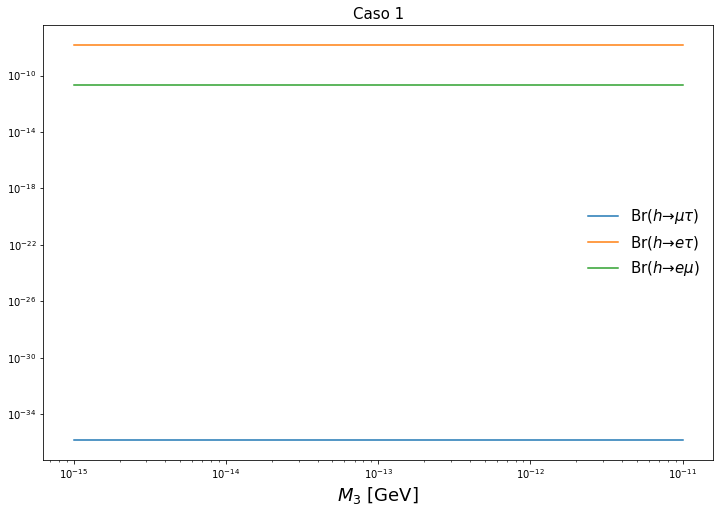

In [83]:
plt.figure(figsize=(12,8));
plt.loglog(Mmp,(YW23)/Wtot,label=r'Br($h \to \mu \tau$)');
plt.loglog(Mmp,(YW13 #+ YW31
                         )/Wtot,label=r'Br($h \to e \tau$)');
plt.loglog(Mmp,(YW12 #+ YW21
                         )/Wtot,label=r'Br($h \to e \mu$)');


#plt.xlim(1e2,1e3)
#plt.yticks(fontsize=18);
#plt.xticks(fontsize=18);

plt.title(r'Caso 1', fontsize=15);
plt.xlabel('$M_3$ [GeV]',fontsize=18);
plt.legend(fontsize=15,frameon=False);
#plt.savefig('caso1_with_nu.png',dpi=200)

In [ ]:
YW23